## Pipeline of building model in Machine Learning



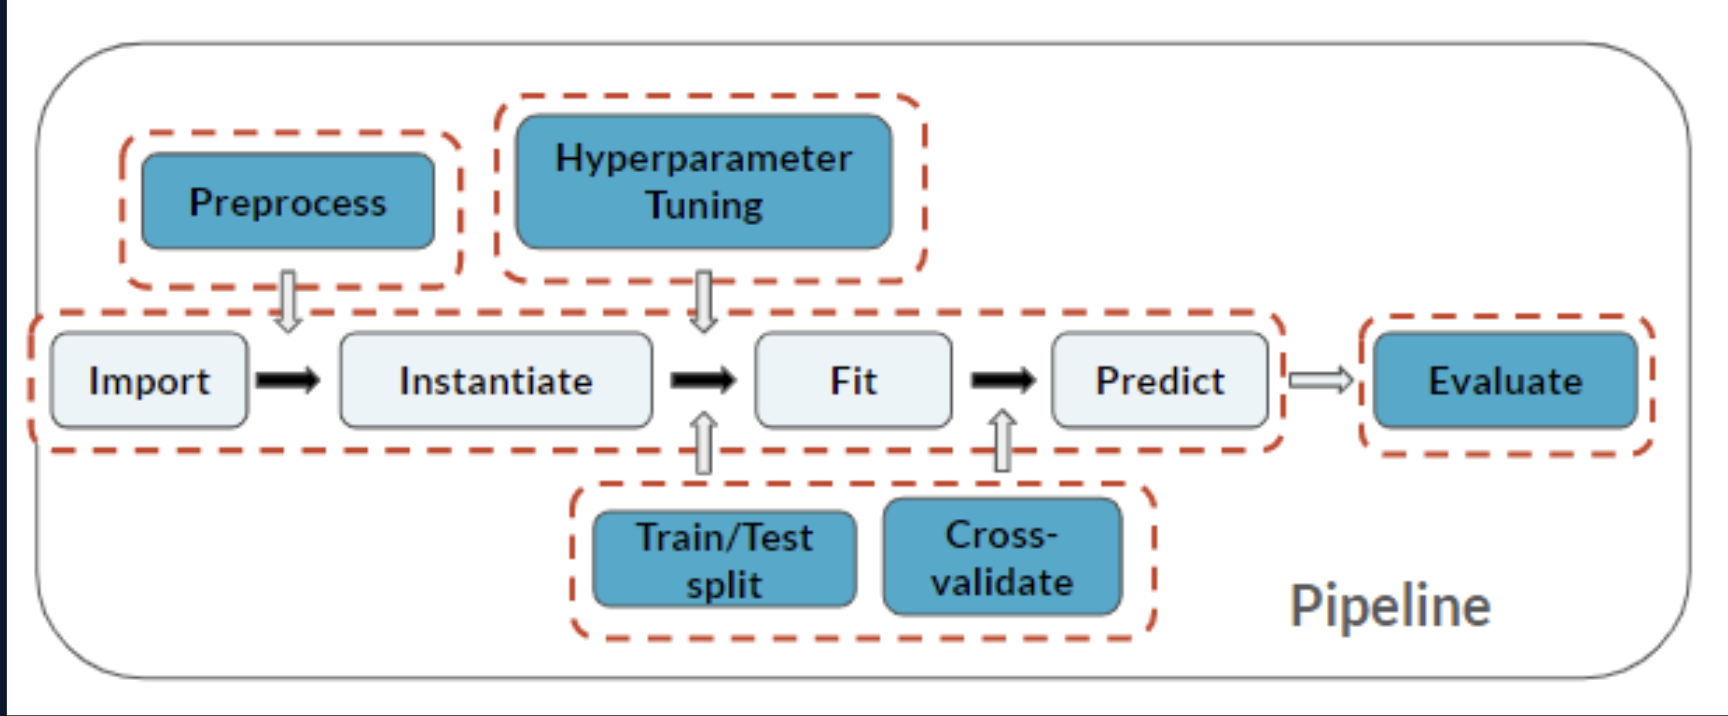

In [2]:
df_RefugeeData <- read.csv('/content/sample_data/RefugeeData.csv')
head(df_RefugeeData)

,Year,Country.of.Asylum,Country.of.Origin,Country.of.Asylum.ISO,Country.of.Origin.ISO,Refugees,Returned.Refugees,Asylum.Seekers,IDPs,Returned.IDPs,Stateless,HST,OOC
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1991,-,Afghanistan,-,AFG,6306301,178270,0,0,0,0,0,0
2,1991,-,Albania,-,ALB,3542,220,0,0,0,0,0,0
3,1991,-,Algeria,-,DZA,55,0,0,0,0,0,0,0
4,1991,-,Angola,-,AGO,381638,35280,0,0,0,0,0,0
5,1991,-,Egypt,-,EGY,98,0,0,0,0,0,0,0
6,1991,-,Argentina,-,ARG,196,0,0,0,0,0,0,0


In [3]:
df_worldbank <- read.csv('/content/sample_data/worldbank_data.csv')
head(df_worldbank)

,country,iso2c,iso3c,year,status,lastupdated,edu_exp_gdp,gdp_per_capita,gov_exp_gdp,unemployment_rate,⋯,population,urban_pop_percent,education_index,hdi_proxy,region,capital,longitude,latitude,income,lending
,<chr>,<chr>,<chr>,<int>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Afghanistan,AF,AFG,2015,NA,2025-07-01,3.25580,565.5697,NA,9.052,⋯,33831764,24.803,53.28514,590,South Asia,Kabul,69.1761,34.5228,Low income,IDA
2,Afghanistan,AF,AFG,2017,NA,2025-07-01,4.34319,525.4698,NA,11.184,⋯,35688935,25.250,55.40215,530,South Asia,Kabul,69.1761,34.5228,Low income,IDA
3,Afghanistan,AF,AFG,2016,NA,2025-07-01,4.54397,522.0822,NA,10.133,⋯,34700612,25.020,53.50634,560,South Asia,Kabul,69.1761,34.5228,Low income,IDA
4,Afghanistan,AF,AFG,2014,NA,2025-07-01,3.69522,625.0549,NA,7.915,⋯,32792523,24.587,54.23548,640,South Asia,Kabul,69.1761,34.5228,Low income,IDA
5,Afghanistan,AF,AFG,2009,NA,2025-07-01,4.81064,452.0537,NA,7.754,⋯,27466101,23.528,44.39717,460,South Asia,Kabul,69.1761,34.5228,Low income,IDA
6,Afghanistan,AF,AFG,2013,NA,2025-07-01,3.45446,637.0871,NA,7.930,⋯,31622704,24.373,54.75422,670,South Asia,Kabul,69.1761,34.5228,Low income,IDA


In [5]:
df_Refugee = df_RefugeeData[c('Year', 'Country.of.Origin', 'Country.of.Origin.ISO', 'Refugees', 'Returned.Refugees')]
head(df_Refugee)

,Year,Country.of.Origin,Country.of.Origin.ISO,Refugees,Returned.Refugees
,<int>,<chr>,<chr>,<int>,<int>
1,1991,Afghanistan,AFG,6306301,178270
2,1991,Albania,ALB,3542,220
3,1991,Algeria,DZA,55,0
4,1991,Angola,AGO,381638,35280
5,1991,Egypt,EGY,98,0
6,1991,Argentina,ARG,196,0


In [7]:
colSums(is.na(df_worldbank))

country             iso2c             iso3c              year 
                0                21                 0                 0 
           status       lastupdated       edu_exp_gdp    gdp_per_capita 
             4087                 0                 0                26 
      gov_exp_gdp unemployment_rate    inflation_rate        population 
              554               333               302                 0 
urban_pop_percent   education_index         hdi_proxy            region 
                0               962               109                 0 
          capital         longitude          latitude            income 
                0                10                10                 0 
          lending 
                0

In [8]:
colSums(is.na(df_Refugee))

Year     Country.of.Origin Country.of.Origin.ISO 
                    0                     0                     0 
             Refugees     Returned.Refugees 
                    0                     0

In [9]:
df_worldbank = df_worldbank[colnames(df_worldbank) != 'status']
head(df_worldbank)

,country,iso2c,iso3c,year,lastupdated,edu_exp_gdp,gdp_per_capita,gov_exp_gdp,unemployment_rate,inflation_rate,population,urban_pop_percent,education_index,hdi_proxy,region,capital,longitude,latitude,income,lending
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Afghanistan,AF,AFG,2015,2025-07-01,3.25580,565.5697,NA,9.052,-0.6617092,33831764,24.803,53.28514,590,South Asia,Kabul,69.1761,34.5228,Low income,IDA
2,Afghanistan,AF,AFG,2017,2025-07-01,4.34319,525.4698,NA,11.184,4.9759515,35688935,25.250,55.40215,530,South Asia,Kabul,69.1761,34.5228,Low income,IDA
3,Afghanistan,AF,AFG,2016,2025-07-01,4.54397,522.0822,NA,10.133,4.3838920,34700612,25.020,53.50634,560,South Asia,Kabul,69.1761,34.5228,Low income,IDA
4,Afghanistan,AF,AFG,2014,2025-07-01,3.69522,625.0549,NA,7.915,4.6739960,32792523,24.587,54.23548,640,South Asia,Kabul,69.1761,34.5228,Low income,IDA
5,Afghanistan,AF,AFG,2009,2025-07-01,4.81064,452.0537,NA,7.754,-6.8111611,27466101,23.528,44.39717,460,South Asia,Kabul,69.1761,34.5228,Low income,IDA
6,Afghanistan,AF,AFG,2013,2025-07-01,3.45446,637.0871,NA,7.930,7.3857718,31622704,24.373,54.75422,670,South Asia,Kabul,69.1761,34.5228,Low income,IDA


In [13]:
merged_df <- merge(df_worldbank, df_Refugee, by.x = "country", by.y = "Country.of.Origin", all.x = TRUE)
head(merged_df)

,country,iso2c,iso3c,year,lastupdated,edu_exp_gdp,gdp_per_capita,gov_exp_gdp,unemployment_rate,inflation_rate,⋯,region,capital,longitude,latitude,income,lending,Year,Country.of.Origin.ISO,Refugees,Returned.Refugees
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<int>
1,Afghanistan,AF,AFG,2007,2025-07-01,4.174895,376.2232,NA,7.817,8.680571,⋯,South Asia,Kabul,69.1761,34.5228,Low income,IDA,2008,AFG,2833116,278483
2,Afghanistan,AF,AFG,2007,2025-07-01,4.174895,376.2232,NA,7.817,8.680571,⋯,South Asia,Kabul,69.1761,34.5228,Low income,IDA,2002,AFG,2510294,1957955
3,Afghanistan,AF,AFG,2007,2025-07-01,4.174895,376.2232,NA,7.817,8.680571,⋯,South Asia,Kabul,69.1761,34.5228,Low income,IDA,2000,AFG,3587327,292484
4,Afghanistan,AF,AFG,2007,2025-07-01,4.174895,376.2232,NA,7.817,8.680571,⋯,South Asia,Kabul,69.1761,34.5228,Low income,IDA,1991,AFG,6306301,178270
5,Afghanistan,AF,AFG,2007,2025-07-01,4.174895,376.2232,NA,7.817,8.680571,⋯,South Asia,Kabul,69.1761,34.5228,Low income,IDA,2015,AFG,2666294,61381
6,Afghanistan,AF,AFG,2007,2025-07-01,4.174895,376.2232,NA,7.817,8.680571,⋯,South Asia,Kabul,69.1761,34.5228,Low income,IDA,1995,AFG,2679132,348343


In [14]:
nrow(merged_df)

[1] 105781

In [15]:
summary(merged_df)

   country             iso2c              iso3c                year     
 Length:105781      Length:105781      Length:105781      Min.   :1990  
 Class :character   Class :character   Class :character   1st Qu.:2002  
 Mode  :character   Mode  :character   Mode  :character   Median :2010  
                                                          Mean   :2009  
                                                          3rd Qu.:2017  
                                                          Max.   :2023  
                                                                        
 lastupdated         edu_exp_gdp     gdp_per_capita       gov_exp_gdp     
 Length:105781      Min.   : 0.000   Min.   :    60.23   Min.   :  2.111  
 Class :character   1st Qu.: 3.106   1st Qu.:  1367.77   1st Qu.: 11.935  
 Mode  :character   Median : 4.220   Median :  4412.84   Median : 16.283  
                    Mean   : 4.386   Mean   : 12179.53   Mean   : 16.681  
                    3rd Qu.: 5.390   3rd 

## Data preparation
Handle missing values in the `merged_df` dataset and create the target variable `EduExp_GDP_Category` if it doesn't exist, or ensure it is in the correct format for classification.


Target Value/ Label, Y, x1, x2, x3,...

In [16]:
colSums(is.na(merged_df))

country                 iso2c                 iso3c 
                    0                   693                     0 
                 year           lastupdated           edu_exp_gdp 
                    0                     0                     0 
       gdp_per_capita           gov_exp_gdp     unemployment_rate 
                  315                 11910                  4924 
       inflation_rate            population     urban_pop_percent 
                 6531                     0                     0 
      education_index             hdi_proxy                region 
                24154                  1789                     0 
              capital             longitude              latitude 
                    0                    10                    10 
               income               lending                  Year 
                    0                     0                   619 
Country.of.Origin.ISO              Refugees     Returned.Refugees 
                  619                   619                   619


Handle missing values by imputing the median for numerical columns with missing values and remove rows with missing categorical data. Create the target variable `EduExp_GDP_Category` by discretizing `edu_exp_gdp` into quantiles and converting it to a factor.



In [17]:
# Impute missing numerical values with the median
numerical_cols = c("gdp_per_capita", "gov_exp_gdp", "unemployment_rate", "inflation_rate", "education_index", "hdi_proxy", "longitude", "latitude", "Refugees", "Returned.Refugees")
for (col in numerical_cols) {
  if (any(is.na(merged_df[[col]]))) {
    median_val = median(merged_df[[col]], na.rm = TRUE)
    merged_df[[col]][is.na(merged_df[[col]])] = median_val
  }
}

# Remove rows with missing categorical values in 'iso2c' and 'Country.of.Origin.ISO'
merged_df = na.omit(merged_df, cols = c("iso2c", "Country.of.Origin.ISO"))

# Create the target variable EduExp_GDP_Category by discretizing edu_exp_gdp
merged_df$EduExp_GDP_Category = cut(merged_df$edu_exp_gdp,
                                     breaks = quantile(merged_df$edu_exp_gdp, probs = c(0, 0.25, 0.5, 0.75, 1), na.rm = TRUE),
                                     labels = c("Low", "Medium-Low", "Medium-High", "High"),
                                     include.lowest = TRUE)

# Convert the target variable to a factor
merged_df$EduExp_GDP_Category = as.factor(merged_df$EduExp_GDP_Category)

# Display the first few rows and the structure of the updated dataframe
head(merged_df)
str(merged_df)

,country,iso2c,iso3c,year,lastupdated,edu_exp_gdp,gdp_per_capita,gov_exp_gdp,unemployment_rate,inflation_rate,⋯,capital,longitude,latitude,income,lending,Year,Country.of.Origin.ISO,Refugees,Returned.Refugees,EduExp_GDP_Category
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<fct>
1,Afghanistan,AF,AFG,2007,2025-07-01,4.174895,376.2232,16.28296,7.817,8.680571,⋯,Kabul,69.1761,34.5228,Low income,IDA,2008,AFG,2833116,278483,Medium-Low
2,Afghanistan,AF,AFG,2007,2025-07-01,4.174895,376.2232,16.28296,7.817,8.680571,⋯,Kabul,69.1761,34.5228,Low income,IDA,2002,AFG,2510294,1957955,Medium-Low
3,Afghanistan,AF,AFG,2007,2025-07-01,4.174895,376.2232,16.28296,7.817,8.680571,⋯,Kabul,69.1761,34.5228,Low income,IDA,2000,AFG,3587327,292484,Medium-Low
4,Afghanistan,AF,AFG,2007,2025-07-01,4.174895,376.2232,16.28296,7.817,8.680571,⋯,Kabul,69.1761,34.5228,Low income,IDA,1991,AFG,6306301,178270,Medium-Low
5,Afghanistan,AF,AFG,2007,2025-07-01,4.174895,376.2232,16.28296,7.817,8.680571,⋯,Kabul,69.1761,34.5228,Low income,IDA,2015,AFG,2666294,61381,Medium-Low
6,Afghanistan,AF,AFG,2007,2025-07-01,4.174895,376.2232,16.28296,7.817,8.680571,⋯,Kabul,69.1761,34.5228,Low income,IDA,1995,AFG,2679132,348343,Medium-Low


'data.frame':	104469 obs. of  25 variables:
 $ country              : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ iso2c                : chr  "AF" "AF" "AF" "AF" ...
 $ iso3c                : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ year                 : int  2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...
 $ lastupdated          : chr  "2025-07-01" "2025-07-01" "2025-07-01" "2025-07-01" ...
 $ edu_exp_gdp          : num  4.17 4.17 4.17 4.17 4.17 ...
 $ gdp_per_capita       : num  376 376 376 376 376 ...
 $ gov_exp_gdp          : num  16.3 16.3 16.3 16.3 16.3 ...
 $ unemployment_rate    : num  7.82 7.82 7.82 7.82 7.82 ...
 $ inflation_rate       : num  8.68 8.68 8.68 8.68 8.68 ...
 $ population           : int  25909852 25909852 25909852 25909852 25909852 25909852 25909852 25909852 25909852 25909852 ...
 $ urban_pop_percent    : num  23.1 23.1 23.1 23.1 23.1 ...
 $ education_index      : num  29.1 29.1 29.1 29.1 29.1 ...
 $ hdi_proxy            : num  330 330 

## Feature selection

Select relevant features from the `merged_df` dataset that will be used to train the decision tree model.


Training data:
- X : Features
- Y: EduExp_GDP_Category

Features -> original column, new column should calcualte from original columns
Features -> used in data analysis and to build a AI model(training data:  (Features), Y (EduExp_GDP_Category))

In [18]:
# Identify relevant columns for the decision tree model
# Exclude identifiers ('country', 'iso2c', 'iso3c', 'lastupdated', 'capital', 'longitude', 'latitude', 'Country.of.Origin.ISO')
# Exclude the original 'edu_exp_gdp' and the target variable 'EduExp_GDP_Category'
# Keep columns representing socioeconomic factors, demographic information, and refugee data
feature_cols = c(
  "year",
  "gdp_per_capita",
  "gov_exp_gdp",
  "unemployment_rate",
  "inflation_rate",
  "population",
  "urban_pop_percent",
  "education_index",
  "hdi_proxy",
  "region",
  "income",
  "lending",
  "Refugees",
  "Returned.Refugees",
  "Year"
)

# Create a vector containing the names of the selected features
selected_features = feature_cols

# Print the selected features to verify
print(selected_features)

 [1] "year"              "gdp_per_capita"    "gov_exp_gdp"      
 [4] "unemployment_rate" "inflation_rate"    "population"       
 [7] "urban_pop_percent" "education_index"   "hdi_proxy"        
[10] "region"            "income"            "lending"          
[13] "Refugees"          "Returned.Refugees" "Year"             


## Data splitting

Split the prepared data into training and testing sets.



Set the random seed, create the index for splitting, and then create the training and testing dataframes based on the index.



In [20]:
# Set a random seed for reproducibility
set.seed(123)

# Create an index for splitting the data (70% train, 30% test)
train_index = sample(seq_len(nrow(merged_df)), size = floor(0.70 * nrow(merged_df)))

# Create the training dataset
train_df = merged_df[train_index, ]

# Create the testing dataset
test_df = merged_df[-train_index, ]

# Print the dimensions of the training and testing datasets
print(paste("Dimensions of training dataset:", nrow(train_df), "rows,", ncol(train_df), "columns"))
print(paste("Dimensions of testing dataset:", nrow(test_df), "rows,", ncol(test_df), "columns"))

[1] "Dimensions of training dataset: 73128 rows, 25 columns"
[1] "Dimensions of testing dataset: 31341 rows, 25 columns"


## Model training

Train a decision tree model on the training data.


Train a decision tree model using the rpart library on the training data with the selected features.



In [21]:
# Load the rpart library
library(rpart)

# Create the formula for the decision tree model using the selected features
formula = as.formula(paste("EduExp_GDP_Category ~", paste(selected_features, collapse = " + ")))

# Train the decision tree model
decision_tree_model = rpart(formula, data = train_df, method = "class")

# Print a summary of the trained model
print(decision_tree_model)

n= 73128 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 73128 54787 High (0.24956241 0.25004102 0.24958976 0.25080680)  
   2) gov_exp_gdp< 16.51855 41769 25268 Low (0.39505375 0.31317484 0.18899184 0.10277957)  
     4) gov_exp_gdp< 11.00631 11609  4104 Low (0.64648118 0.24532690 0.07451116 0.03368076) *
     5) gov_exp_gdp>=11.00631 30160 19927 Medium-Low (0.29827586 0.33929045 0.23305703 0.12937666)  
      10) income=High income,Low income,Upper middle income 21454 12711 Medium-Low (0.25804046 0.40752307 0.26074392 0.07369255) *
      11) income=Lower middle income 8706  5246 Low (0.39742706 0.17114634 0.16482885 0.26659775)  
        22) population>=2207610 6989  3624 Low (0.48147088 0.19473458 0.15324081 0.17055373) *
        23) population< 2207610 1717   588 High (0.05532906 0.07513104 0.21199767 0.65754222) *
   3) gov_exp_gdp>=16.51855 31359 17311 High (0.05577346 0.16594917 0.33030390 0.44797347)  
     6) gov_exp_gdp< 22.83639 23433 13960 Med

## Prediction

Make predictions on the testing data using the trained model.



Use the trained decision tree model to make predictions on the test dataset and display the first few predictions.



In [22]:
# Make predictions on the testing data
predictions = predict(decision_tree_model, newdata = test_df, type = "class")

# Display the first few predictions
head(predictions)

2          3          4          6          9         11 
Medium-Low Medium-Low Medium-Low Medium-Low Medium-Low Medium-Low 
Levels: Low Medium-Low Medium-High High

## Model evaluation

Evaluate the performance of the decision tree model using appropriate metrics.


Generate a confusion matrix and calculate evaluation metrics using the predicted and actual values in the testing set.



In [24]:
# Install the caret package if it's not already installed
if (!requireNamespace("caret", quietly = TRUE)) {
  install.packages("caret")
}

# Load the caret library for evaluation metrics
library(caret)

# Generate the confusion matrix
confusion_matrix = confusionMatrix(predictions, test_df$EduExp_GDP_Category)

# Print the confusion matrix
print(confusion_matrix)

# Extract and print evaluation metrics
print(confusion_matrix$overall)
print(confusion_matrix$byClass)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



Confusion Matrix and Statistics

             Reference
Prediction     Low Medium-Low Medium-High High
  Low         4716       1856         817  660
  Medium-Low  2372       4197        2537  730
  Medium-High  184       1024        3090 1745
  High         607        762        1419 4625

Overall Statistics
                                         
               Accuracy : 0.5306         
                 95% CI : (0.525, 0.5361)
    No Information Rate : 0.2514         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.3741         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      

Statistics by Class:

                     Class: Low Class: Medium-Low Class: Medium-High
Sensitivity              0.5986            0.5354            0.39298
Specificity              0.8579            0.7601            0.87422
Pos Pred Value           0.5859            0.4267            0.51134
Neg Pred Val

## Visualization

Visualize the trained decision tree to help understand how it works.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



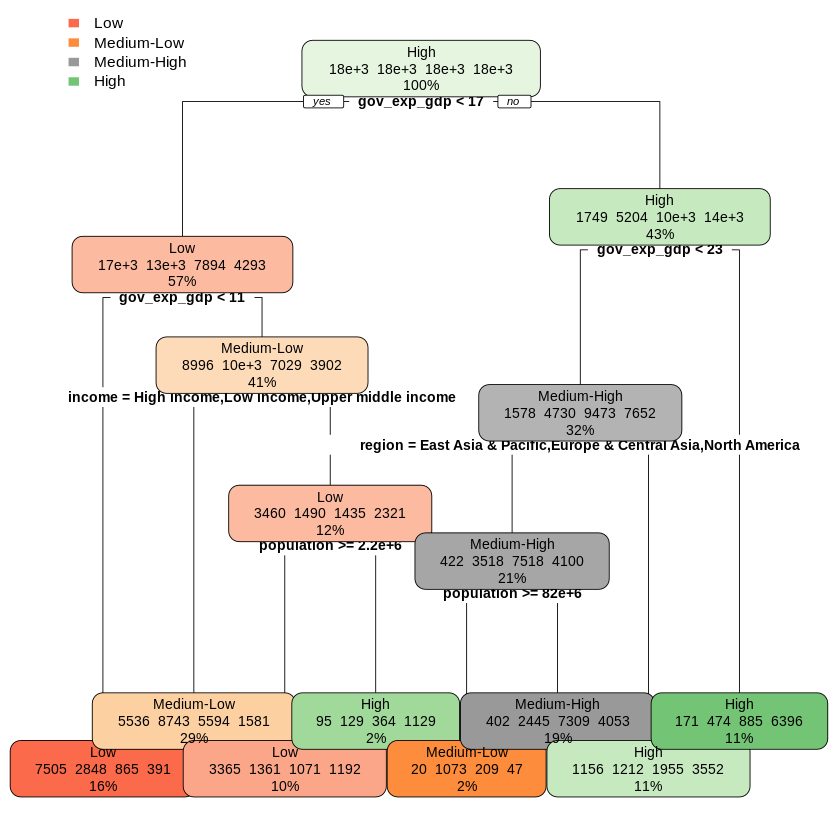

In [25]:
# Install the rpart.plot package if it's not already installed
if (!requireNamespace("rpart.plot", quietly = TRUE)) {
  install.packages("rpart.plot")
}

# Load the rpart.plot library
library(rpart.plot)

# Visualize the trained decision tree
rpart.plot(decision_tree_model, extra = 101, fallen.leaves = TRUE, cex = 0.7)

## Explaining the Decision Tree Process

### 1. Data Preparation
Before building the decision tree, we prepared the data:
- We handled missing values by imputing numerical data with the median and removing rows with missing categorical data. This is important because decision trees, like many machine learning algorithms, cannot handle missing values.
- We created a target variable `EduExp_GDP_Category` by dividing the `edu_exp_gdp` values into four categories (Low, Medium-Low, Medium-High, High). This transforms a continuous variable into a categorical one, suitable for a classification decision tree.
- We converted `EduExp_GDP_Category` to a factor. Decision trees in R's `rpart` package require the target variable for classification to be a factor.

### 2. Feature Selection
We selected a subset of features from the dataset to use as input for the decision tree. We chose features that we believe could be related to education expenditure as a percentage of GDP, such as economic indicators (GDP per capita, inflation rate), demographic information (population, urban population percentage), and other relevant indices (education index, HDI proxy). We excluded identifier columns and the original continuous target variable.

Decision trees work by making splits based on the values of these input features to classify the target variable.

### 3. Data Splitting
We split the prepared data into two sets: a training set (70%) and a testing set (30%).

- The training set is used to train the decision tree model, meaning the algorithm learns the patterns and rules from this data.
- The testing set is used to evaluate the performance of the trained model on unseen data. This gives us an estimate of how well the model will generalize to new data.

This split is crucial to avoid overfitting, where the model performs very well on the training data but poorly on new data.

### 4. Model Training
We trained a classification decision tree model using the `rpart` package in R. The `rpart` algorithm recursively partitions the data based on the selected features to create a tree-like structure.

- At each node of the tree, the algorithm considers different features and their values to find the 'best' split that maximizes the separation of the target classes.
- The printed model summary shows the structure of the tree, including the splitting rules at each node, the number of observations in each node, and the predicted class for that node (`yval`).

For example, a split might be `gdp_per_capita < 5000`. Observations satisfying this condition go down one branch, and those that don't go down another.

### 5. Prediction
After training, we used the `predict` function to make predictions on the testing dataset.

- The trained decision tree traverses down the tree for each observation in the testing set, following the splitting rules based on the feature values.
- When an observation reaches a terminal node (a leaf), the predicted class for that leaf is assigned as the prediction for that observation.

We used `type = "class"` to get the predicted class labels.

### 6. Model Evaluation
We evaluated the performance of the trained model using a confusion matrix and various metrics like accuracy, precision, recall, and F1-score.

- The confusion matrix shows the number of correct and incorrect predictions for each class.
- **Accuracy:** The overall proportion of correctly classified instances. Our model achieved an accuracy of approximately 0.5306, meaning it correctly classified about 53.06% of the instances in the test set.
- **Precision:** For each class, it's the proportion of correctly predicted positive instances out of all instances predicted as positive for that class. It tells us how many of the predicted instances for a class were actually that class.
- **Recall (Sensitivity):** For each class, it's the proportion of correctly predicted positive instances out of all actual positive instances for that class. It tells us how many of the actual instances of a class were correctly identified.
- **F1-score:** The harmonic mean of precision and recall, providing a balanced measure of the model's performance, especially useful when there are imbalanced classes.

The per-class statistics show how well the model performs for each category of `EduExp_GDP_Category`. This helps us understand if the model is better at predicting certain categories than others.

### 7. Visualization
We visualized the decision tree to gain a better understanding of its structure and how it makes decisions.

- The visualization shows the nodes, branches, and leaves of the tree.
- Each internal node represents a splitting rule based on a feature and a threshold (e.g., `population < 1000000`).
- The branches represent the outcomes of the splitting rule (e.g., 'True' or 'False').
- Each leaf node represents a predicted class (e.g., 'High'). The number of instances in that leaf and the class distribution might also be shown.

By following a path from the root node down to a leaf, you can see the sequence of decisions the tree makes to arrive at a prediction for a given instance.

In [27]:
write.csv(merged_df, "merged_data.csv", row.names = FALSE)